In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import timedelta

In [ ]:
# Load the sales data (adjust the file path as needed)
sales = pd.read_excel('./furniture.xlsx')
# Convert date columns to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['ship_date'] = pd.to_datetime(sales['ship_date'])

###  Calculate the total profit and profit margin for each region

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specified date range
filtered_data = sales[(sales['order_date'] >= '2020-01-06') & (sales['order_date'] <= '2023-12-30')]

# Group by region and calculate total profit and total sales
grouped_data = filtered_data.groupby('region').agg(
    total_profit=pd.NamedAgg(column='profit', aggfunc='sum'),
    total_sales=pd.NamedAgg(column='total_sales', aggfunc='sum')
)

# Calculate profit margin
grouped_data['profit_margin'] = (grouped_data['total_profit'] / grouped_data['total_sales']) * 100

# Reset index for displaying
grouped_data = grouped_data.reset_index()

# Plot total profit by region
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['region'], grouped_data['total_profit'], color='skyblue')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot profit margin by region
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['region'], grouped_data['profit_margin'], color='orange')
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###  Rank regions by profitability and total sales volume

In [ ]:
# Filter data for the specified date range
filtered_data = sales[(sales['order_date'] >= '2020-01-06') & (sales['order_date'] <= '2023-12-30')]

# Group by region and calculate total profit and total sales
grouped_data = filtered_data.groupby('region').agg(
    total_profit=pd.NamedAgg(column='profit', aggfunc='sum'),
    total_sales=pd.NamedAgg(column='total_sales', aggfunc='sum')
)

# Calculate profit margin and percentages
grouped_data['profit_margin'] = (grouped_data['total_profit'] / grouped_data['total_sales']) * 100
total_profit = grouped_data['total_profit'].sum()
total_sales = grouped_data['total_sales'].sum()
grouped_data['profit_percent'] = (grouped_data['total_profit'] / total_profit) * 100
grouped_data['sales_percent'] = (grouped_data['total_sales'] / total_sales) * 100

# Rank regions by total profit and total sales volume
grouped_data['profit_rank'] = grouped_data['total_profit'].rank(ascending=False, method='dense')
grouped_data['sales_rank'] = grouped_data['total_sales'].rank(ascending=False, method='dense')

# Reset index for plotting
grouped_data = grouped_data.reset_index()

# Plot total profit by region
plt.figure(figsize=(10, 6))
colors = ['red' if profit < 0 else 'skyblue' for profit in grouped_data['total_profit']]
bars = plt.bar(grouped_data['region'], grouped_data['total_profit'], color=colors)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot profit margin by region
plt.figure(figsize=(10, 6))
colors = ['red' if margin < 0 else 'orange' for margin in grouped_data['profit_margin']]
bars = plt.bar(grouped_data['region'], grouped_data['profit_margin'], color=colors)
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_margin']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot total profit percent by region
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['region'], grouped_data['profit_percent'], color='green')
plt.title('Total Profit as Percent of Total by Region')
plt.xlabel('Region')
plt.ylabel('Profit Percent (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot total sales percent by region
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['region'], grouped_data['sales_percent'], color='blue')
plt.title('Total Sales as Percent of Total by Region')
plt.xlabel('Region')
plt.ylabel('Sales Percent (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['sales_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


###  Identify regions with declining sales and provide insights on potential causes.

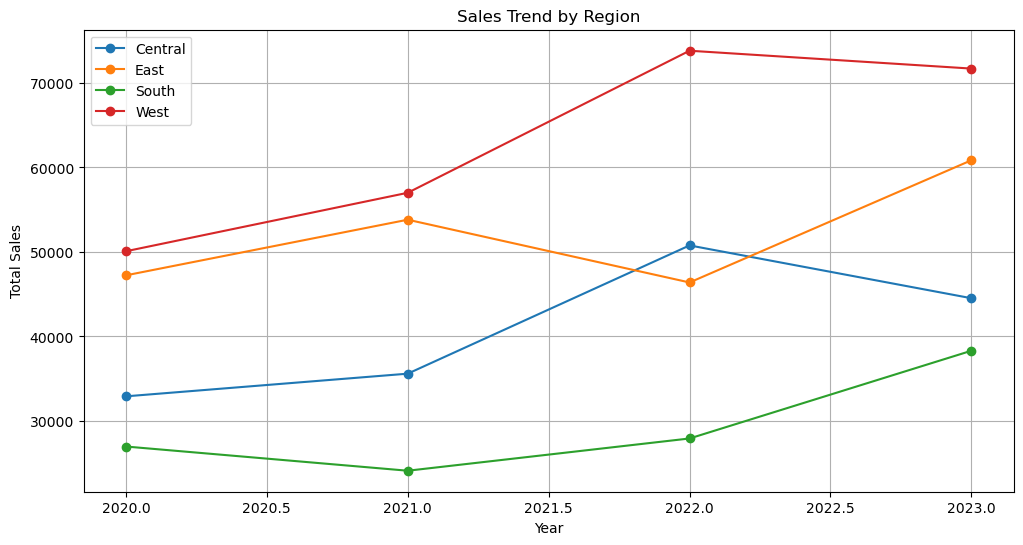

Potential Causes of Declining Sales:
    region  total_sales  avg_discount  avg_quantity  avg_profit
0  Central  163797.1638      0.297380      3.798337   -5.968918
1     East  208291.2040      0.154077      3.683860    5.068496
2    South  117298.6840      0.121536      3.888554   20.395199
3     West  252612.7435      0.131400      3.813296   16.272914


In [5]:
# Load the data (Assuming 'sales' is already loaded from the 'sales' sheet)
sales["year"] = sales["order_date"].dt.year  # Extract year from order_date

# Aggregate total sales by year and region
sales_trend = sales.groupby(["year", "region"])["total_sales"].sum().reset_index()

# Identify regions with declining sales
sales_trend["sales_change"] = sales_trend.groupby("region")["total_sales"].pct_change()
declining_regions = sales_trend[sales_trend["sales_change"] < 0]["region"].unique()

# Plot sales trends for each region
plt.figure(figsize=(12, 6))
for region in sales_trend["region"].unique():
    region_data = sales_trend[sales_trend["region"] == region]
    plt.plot(region_data["year"], region_data["total_sales"], marker="o", label=region)

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Region")
plt.legend()
plt.grid(True)
plt.show()

# Display the identified declining regions
# print("Declining Sales Regions:")
# print(sales_trend[sales_trend["region"].isin(declining_regions)])

# Provide insights on potential causes
region_summary = sales[sales["region"].isin(declining_regions)].groupby(["region"]).agg(
    total_sales=("total_sales", "sum"),
    avg_discount=("discount", "mean"),
    avg_quantity=("quantity", "mean"),
    avg_profit=("profit", "mean"),
).reset_index()

print("Potential Causes of Declining Sales:")
print(region_summary)


### Analyze which product categories and sub-categories are most profitable in each region.

Most Profitable Product Sub-Categories in Each Region:
     region sub_category     profit
1   Central       Chairs  6592.7221
5      East       Chairs  9357.7706
9     South       Chairs  6612.0893
14     West  Furnishings  7641.2704


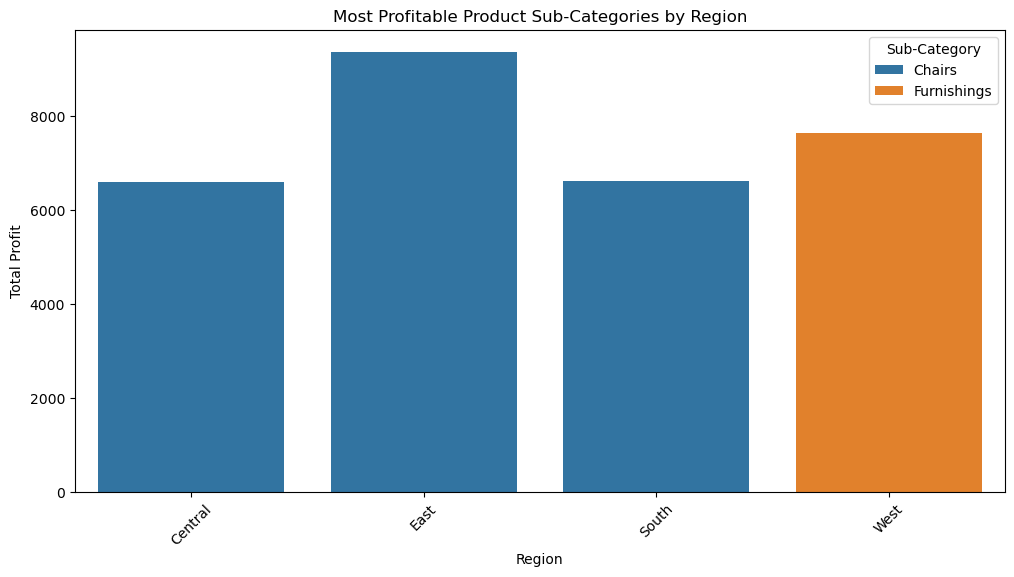

In [6]:
# Analyze most profitable product sub-categories in each region
subcat_profit = sales.groupby(["region", "sub_category"])['profit'].sum().reset_index()
most_profitable_subcat = subcat_profit.loc[subcat_profit.groupby("region")['profit'].idxmax()]

print("Most Profitable Product Sub-Categories in Each Region:")
print(most_profitable_subcat)

# Plot most profitable sub-categories in each region
plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable_subcat, x="region", y="profit", hue="sub_category")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Most Profitable Product Sub-Categories by Region")
plt.legend(title="Sub-Category")
plt.xticks(rotation=45)
plt.show()


### Create a report that recommends regions for increased marketing investment based on  profitability and sales growth potential.

In [7]:
# Recommend regions for increased marketing investment
sales_growth = sales_trend.groupby("region")["sales_change"].mean().reset_index()
sales_growth = sales_growth.rename(columns={"sales_change": "avg_sales_growth"})

investment_recommendations = region_summary.merge(sales_growth, on="region")
investment_recommendations = investment_recommendations.sort_values(by=["avg_sales_growth", "total_sales", "avg_profit"], ascending=[False, False, False])

print("Recommended Regions for Increased Marketing Investment:")
print(investment_recommendations)


Recommended Regions for Increased Marketing Investment:
    region  total_sales  avg_discount  avg_quantity  avg_profit  \
2    South  117298.6840      0.121536      3.888554   20.395199   
3     West  252612.7435      0.131400      3.813296   16.272914   
0  Central  163797.1638      0.297380      3.798337   -5.968918   
1     East  208291.2040      0.154077      3.683860    5.068496   

   avg_sales_growth  
2          0.141359  
3          0.134852  
0          0.128308  
1          0.104405  


--- The end ---